In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from ml_model_cnn import data_generator
from ml_model_cnn import ml_models
from tensorflow.keras import models


### Load the data for ML model

In [2]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'

holdout = 10
nsteps = 3

data = data_generator(output_dir, holdout=holdout, nsteps = nsteps, dim=1, csv=1, x_res=100)
X_train_base, Y_train_base, X_test, Y_test = data.read_1d()


### Split the data and train the model

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_base[:,:,0:2], Y_train_base, test_size=0.2, 
                                                    shuffle=False)
model_instantiate = ml_models(nx = 100, dim=2)
my_model = model_instantiate.cnn_model_1d_multistep_diff(K=nsteps)

In [4]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l1 (Conv1D)                │ (None, 100, 6)         │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l2 (Conv1D)                │ (None, 100, 6)         │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l3 (Conv1D)                │ (None, 100, 6)         │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ neural (TimeDistributed)        │ (None, 100, 128)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv1D)                 │ (None, 100, 3)         │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553 (6.07 KB)

 Trainable params: 1,553 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.build(input_shape=(None, 100, 1))  # assuming nx = 100

my_model.compile(loss='mse', optimizer=optimizer)

In [6]:
history = my_model.fit(X_train, Y_train, epochs=32, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1956 - val_loss: 0.0333
Epoch 2/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - val_loss: 0.0017
Epoch 3/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 6.5947e-04
Epoch 4/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0596e-04 - val_loss: 4.6681e-04
Epoch 5/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1886e-04 - val_loss: 3.0272e-04
Epoch 6/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2108e-04 - val_loss: 1.5947e-04
Epoch 7/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9651e-04 - val_loss: 1.1720e-04
Epoch 8/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3602e-04 - val_loss: 9.2632e-05
Epoch 9/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0535e-04 - val_loss: 7.8411e-05
Epoch 10/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9245e-05 - val_loss: 6.4807e-05
Epoch 11/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9130e-05 - val_loss: 5.8513e-05
Epoch

In [7]:
Y_train.shape

(1558, 100, 3)

##### 🎨 Make the plots pretty 

In [8]:

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

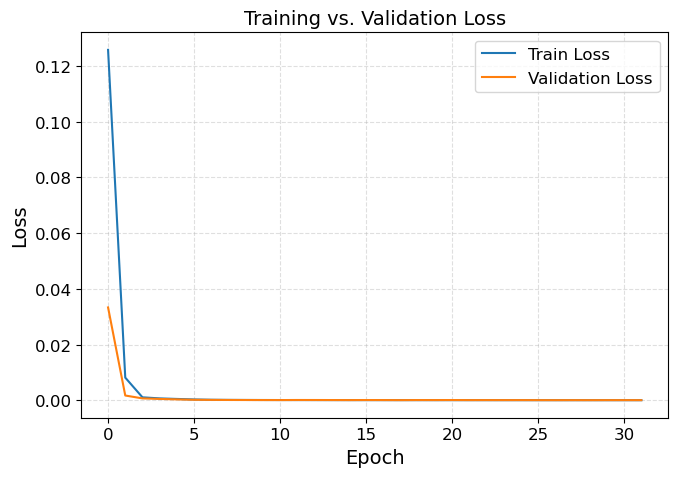

In [9]:

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

In [10]:
u_pred = my_model.predict(X_validation)
print(u_pred.shape)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
(390, 100, 3)


#### This is the Validation set prediction

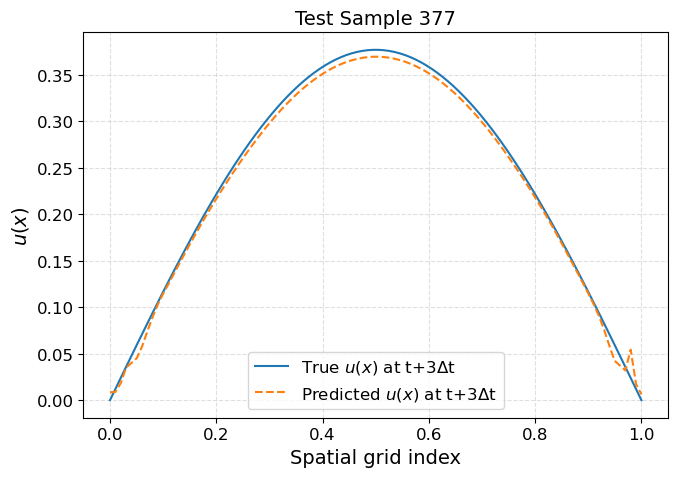

In [15]:

i = 377  # which test example to look at
# Y_validation_np = Y_validation.values[..., np.newaxis]

fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(X_train_base[0,:,2], Y_validation[i+2, :, 0], label='True $u(x)$ at t+3Δt')
plt.plot(X_train_base[0,:,2], u_pred[i, :, 2], '--', label='Predicted $u(x)$ at t+3Δt')

plt.legend()
plt.xlabel('Spatial grid index')
plt.ylabel('$u(x)$')
plt.title(f'Test Sample {i}')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Predict the last snapshot, based on the last snapshot in the test set.

The train and test set contains the snapshots from 0 - t_final - holdout 

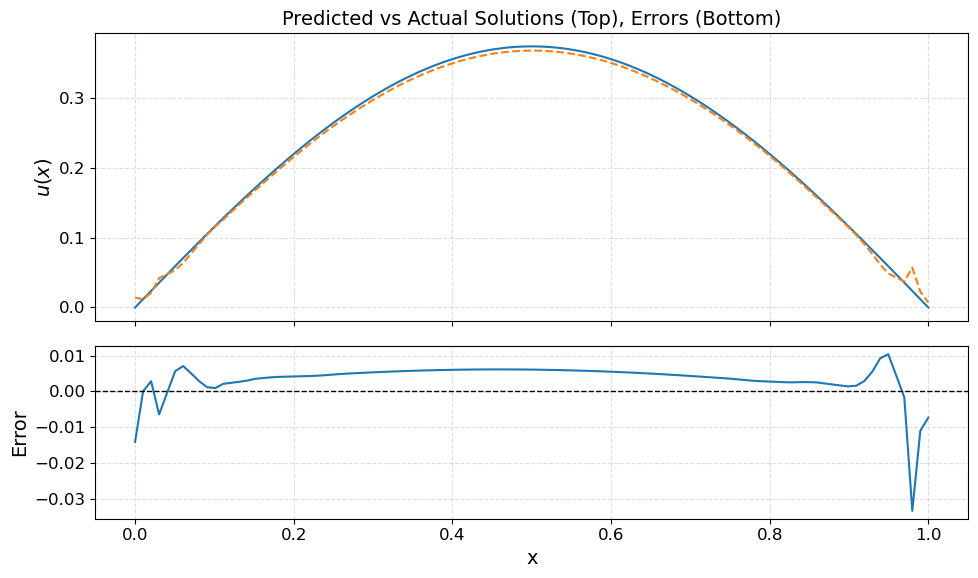

In [12]:
x = np.linspace(0, 1, X_test.shape[1])

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1.8]})

files = sorted([f for f in os.listdir('../data/csv_files/diffusion0.1/') if f.startswith('data_') and f.endswith('.csv')])


# Prediction
u_tn = X_test[:,:,0:2]
u_pred_new = my_model(u_tn, training=False).numpy()[0, :, 0]

# True solution
i = 10
last_snap = len(files) - i - 1
filename = os.path.join('../data/csv_files/diffusion0.1/', f'data_{last_snap}.csv')
data = pd.read_csv(filename)
var_u = data.filter(like='u_t').values.flatten()

# Plot true vs predicted
axs[0].plot(x, var_u, linewidth=1.5, label=f'PDE t={last_snap}')
axs[0].plot(x, u_pred_new, '--', linewidth=1.5, label=f'Pred t={last_snap}')

# Plot error
error = var_u - u_pred_new
axs[1].plot(x, error, linewidth=1.5, label=f'Error t={last_snap}')

# Top: Predictions vs PDE
axs[0].set_ylabel('$u(x)$')
axs[0].set_title('Predicted vs Actual Solutions (Top), Errors (Bottom)')
#axs[0].legend(ncol=3)
axs[0].grid(True, linestyle='--', alpha=0.4)

# Bottom: Errors
axs[1].axhline(0, color='k', linestyle='--', linewidth=1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
#axs[1].legend(ncol=4)
axs[1].grid(True, linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()

In [ ]:
# Trigger model build if not done
dummy_input = X_test[0:1, ..., np.newaxis]  # shape: (1, nx, 1)
_ = my_model.predict(dummy_input)
# Get intermediate models
layer_out_l1 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)
layer_out_l2 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l2').output)

# Compute activations
activ_l1 = layer_out_l1.predict(X_test[:1])
activ_l2 = layer_out_l2.predict(X_test[:1])

# Plot conv_l1 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l1[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv1 Activation Maps (Layer: conv_l1)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

# Plot conv_l2 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l2[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv2 Activation Maps (Layer: conv_l2)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

plt.show()

I0000 00:00:1754087829.047187 3750988 service.cc:152] XLA service 0x17b657a40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754087829.047198 3750988 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-08-01 18:37:09.049253: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at conv_ops.cc:62 : INVALID_ARGUMENT: Depth of input must be a multiple of depth of filter: 3 vs 2

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
File "/Users/pushpita/anaconda

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 3 vs 2

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/asyncio/events.py", line 88, in _run
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3100, in run_cell
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3155, in _run_cell
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3367, in run_cell_async
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3612, in run_ast_nodes
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3672, in run_code
File "/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_95311/3647957864.py", line 3, in <module>
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 566, in predict
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 260, in one_step_on_data_distributed
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 250, in one_step_on_data
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 105, in predict_step
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/layers/layer.py", line 936, in __call__
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/ops/operation.py", line 58, in __call__
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/models/functional.py", line 183, in call
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/ops/function.py", line 177, in _run_through_graph
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/models/functional.py", line 648, in call
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/layers/layer.py", line 936, in __call__
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/ops/operation.py", line 58, in __call__
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/layers/convolutional/conv1d.py", line 151, in call
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1342, in conv
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 338, in conv
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 326, in _conv_xla
File "/Users/pushpita/anaconda3/envs/ml_pde/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 313, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_17754[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[functional_1/conv_l1_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_18722]

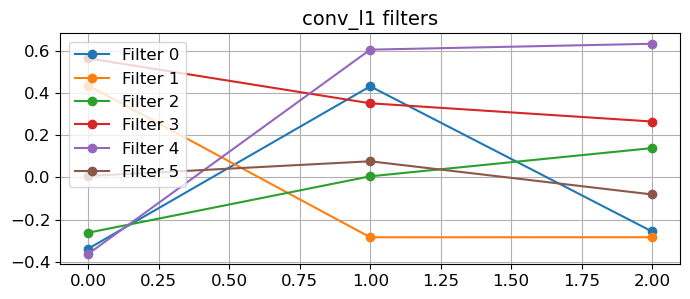

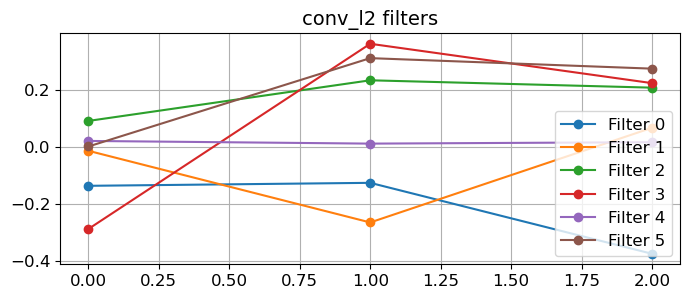

In [17]:
def plot_filters(layer_name):
    weights = my_model.get_layer(layer_name).get_weights()[0]  # shape: (kernel_size, in_channels, out_channels)
    kernel_size, in_channels, out_channels = weights.shape

    plt.figure(figsize=(8, 3))
    for i in range(out_channels):
        plt.plot(weights[:, 0, i],'o-', label=f'Filter {i}')
    plt.title(f'{layer_name} filters')
    plt.grid(True)
    plt.legend()
    plt.show()

# Filters from first conv layer
plot_filters('conv_l1')

# Filters from second conv layer
plot_filters('conv_l2')

In [18]:
# Get conv_l1 weights: shape (3, 1, 6)
weights = my_model.get_layer('conv_l1').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 1 = {cos_sim:.4f}")
    
weights = my_model.get_layer('conv_l2').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 2 = {cos_sim:.4f}")

Filter 0: Cosine similarity to [1, -2, 1] for layer 1 = -0.9834
Filter 1: Cosine similarity to [1, -2, 1] for layer 1 = 0.4962
Filter 2: Cosine similarity to [1, -2, 1] for layer 1 = -0.1837
Filter 3: Cosine similarity to [1, -2, 1] for layer 1 = 0.0722
Filter 4: Cosine similarity to [1, -2, 1] for layer 1 = -0.4046
Filter 5: Cosine similarity to [1, -2, 1] for layer 1 = -0.8317
Filter 0: Cosine similarity to [1, -2, 1] for layer 2 = -0.2527
Filter 1: Cosine similarity to [1, -2, 1] for layer 2 = 0.8692
Filter 2: Cosine similarity to [1, -2, 1] for layer 2 = -0.2114
Filter 3: Cosine similarity to [1, -2, 1] for layer 2 = -0.6264
Filter 4: Cosine similarity to [1, -2, 1] for layer 2 = 0.2070
Filter 5: Cosine similarity to [1, -2, 1] for layer 2 = -0.3415


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


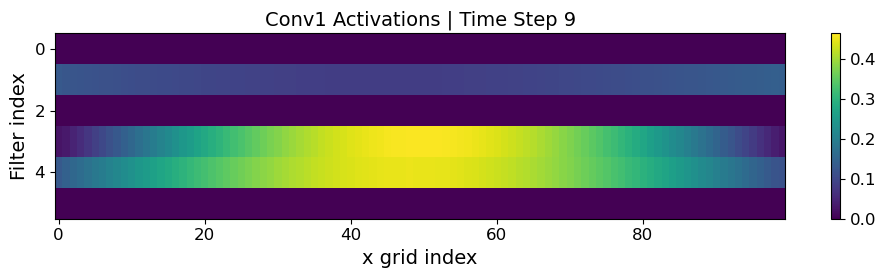

In [19]:
import matplotlib.animation as animation
from tensorflow.keras.models import Model
# Extract conv_l1 activation model
layer_model = Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)

# Generate activations for all time steps in X_test
activations_seq = layer_model.predict(X_test)  # shape: (T, nx, filters)

# Setup animation
fig, ax = plt.subplots(figsize=(10, 3))
img = ax.imshow(activations_seq[0].T, aspect='auto', cmap='viridis', vmin=0, vmax=activations_seq.max())
cbar = fig.colorbar(img)
ax.set_title("Conv1 Activations Over Time")
ax.set_ylabel("Filter index")
ax.set_xlabel("x grid index")

def update(frame):
    img.set_data(activations_seq[frame].T)
    ax.set_title(f"Conv1 Activations | Time Step {frame}")
    return [img]

ani = animation.FuncAnimation(fig, update, frames=len(activations_seq), interval=200, blit=True)
ani.save("activations.mp4")
plt.tight_layout()
plt.show()

### Autoregressive CNN

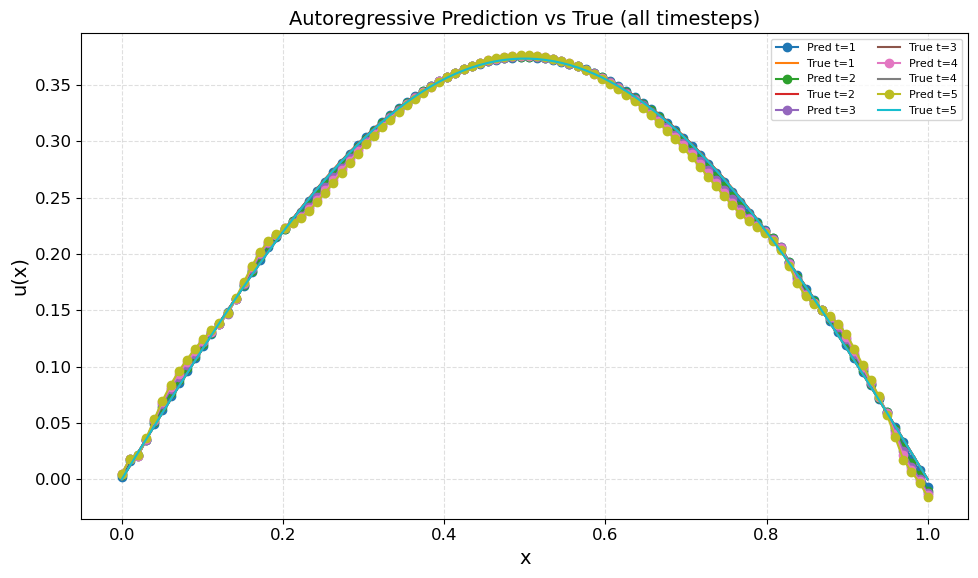

In [20]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'
len_files = len(X_train_base)

num_steps = 5
u_tn = X_test[0].reshape(1, 100, 1).astype(np.float32)
plt.figure(figsize=(10, 6))
# Prediction
for i in range (num_steps):
    u_pred_new = my_model(u_tn, training=False).numpy()[0, :, 0]
    u_tn = u_pred_new.reshape(1, 100, 1).astype(np.float32)
    plt.plot(x, u_pred_new, 'o-', label=f'Pred t={i+1}')
    plt.plot(x, Y_test[i,:], '-', label=f'True t={i+1}')


plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Autoregressive Prediction vs True (all timesteps)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()